In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:


df = pd.read_csv("nba_data_processed.csv")

df.head()

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  679 non-null    object 
 1   Pos     679 non-null    object 
 2   Age     679 non-null    float64
 3   Tm      679 non-null    object 
 4   G       679 non-null    float64
 5   GS      679 non-null    float64
 6   MP      679 non-null    float64
 7   FG      679 non-null    float64
 8   FGA     679 non-null    float64
 9   FG%     676 non-null    float64
 10  3P      679 non-null    float64
 11  3PA     679 non-null    float64
 12  3P%     655 non-null    float64
 13  2P      679 non-null    float64
 14  2PA     679 non-null    float64
 15  2P%     672 non-null    float64
 16  eFG%    676 non-null    float64
 17  FT      679 non-null    float64
 18  FTA     679 non-null    float64
 19  FT%     642 non-null    float64
 20  ORB     679 non-null    float64
 21  DRB     679 non-null    float64
 22  TR

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,676.000000,679.000000,679.000000,655.000000,...,642.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,26.025037,43.337261,20.069219,19.464212,3.249337,6.921060,0.464241,0.996613,2.783063,0.329798,...,0.752586,0.842268,2.620324,3.461708,2.011782,0.601767,0.370545,1.067305,1.660825,8.859057
std,4.325709,24.729145,25.766359,9.415320,2.362501,4.795565,0.112790,0.862033,2.209284,0.128238,...,0.150094,0.731867,1.715881,2.281077,1.891335,0.392063,0.367465,0.799478,0.770299,6.630944
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,22.000000,0.000000,12.150000,1.500000,3.400000,0.415000,0.300000,1.000000,0.297000,...,0.686500,0.300000,1.400000,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000
50%,25.000000,45.000000,6.000000,18.800000,2.600000,5.700000,0.454000,0.800000,2.400000,0.349000,...,0.769000,0.700000,2.300000,3.000000,1.300000,0.500000,0.300000,0.900000,1.600000,6.900000
75%,29.000000,65.500000,36.500000,27.550000,4.200000,9.200000,0.506000,1.500000,4.150000,0.389000,...,0.844750,1.100000,3.400000,4.500000,2.700000,0.800000,0.500000,1.400000,2.200000,11.550000
max,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,1.000000,...,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,3.000000,4.100000,5.000000,33.100000


In [7]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [8]:
print(len(df))
df = df.dropna(subset=["Player"])
print(len(df))

705
679


In [9]:
for i in df.columns:
    print(i, df[i].isna().sum())

Player 0
Pos 0
Age 0
Tm 0
G 0
GS 0
MP 0
FG 0
FGA 0
FG% 3
3P 0
3PA 0
3P% 24
2P 0
2PA 0
2P% 7
eFG% 3
FT 0
FTA 0
FT% 37
ORB 0
DRB 0
TRB 0
AST 0
STL 0
BLK 0
TOV 0
PF 0
PTS 0


In [10]:
df["FG%"] = df["FG%"].fillna(0.0)
df["3P%"] = df["3P%"].fillna(0.0)
df["2P%"] = df["2P%"].fillna(0.0)
df["FT%"] = df["FT%"].fillna(0.0)
df["eFG%"] = df["eFG%"].fillna(0.0)

In [11]:
print(df["G"].mean())
print(df["G"].min())
print(df["G"].max())

print(df["MP"].mean())
print(df["MP"].min())
print(df["MP"].max())



43.337260677466865
1.0
83.0
19.464212076583213
1.0
41.0


In [12]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Check outliers in 'PTS' column
outliers_pts_G = find_outliers_iqr(df, 'G')
print(outliers_pts_G)
outliers_pts_MP = find_outliers_iqr(df, 'MP')
print(outliers_pts_MP)

Empty DataFrame
Columns: [Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS]
Index: []

[0 rows x 29 columns]
Empty DataFrame
Columns: [Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS]
Index: []

[0 rows x 29 columns]


In [13]:
# Filter rows where G (Games) >= 10
df = df[df["G"] >= 10]
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,55.0,12.0,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,75.0,75.0,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22.0,UTA,59.0,22.0,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22.0,MEM,77.0,20.0,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [14]:
df = df[df["MP"] >= 10]
len(df)

517

In [15]:
# Calculate per-36-minute statistics
stats_to_convert = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

for stat in stats_to_convert:
    column_name = f"{stat}_per36"
    df[column_name] = (df[stat] / df['MP']) * 36

# Display the new columns
print("New per-36-minute columns added:")
for stat in stats_to_convert:
    print(f"- {stat}_per36")

# Show a few rows with the new columns
print("\nSample of data with per-36-minute stats:")
print(df[['Player', 'MP', 'PTS', 'PTS_per36', 'AST', 'AST_per36']].head())

New per-36-minute columns added:
- FG_per36
- FGA_per36
- 3P_per36
- 3PA_per36
- 2P_per36
- 2PA_per36
- FT_per36
- FTA_per36
- ORB_per36
- DRB_per36
- TRB_per36
- AST_per36
- STL_per36
- BLK_per36
- TOV_per36
- PF_per36
- PTS_per36

Sample of data with per-36-minute stats:
             Player    MP   PTS  PTS_per36  AST  AST_per36
0  Precious Achiuwa  20.7   9.2  16.000000  0.9   1.565217
1      Steven Adams  27.0   8.6  11.466667  2.3   3.066667
2       Bam Adebayo  34.6  20.4  21.225434  3.2   3.329480
3      Ochai Agbaji  20.5   7.9  13.873171  1.1   1.931707
4      Santi Aldama  21.8   9.0  14.862385  1.3   2.146789


In [16]:
# Remove the original columns that were converted to per-36-minute versions
original_columns_to_remove = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

df = df.drop(columns=original_columns_to_remove)

print(f"Removed {len(original_columns_to_remove)} original columns:")
for col in original_columns_to_remove:
    print(f"- {col}")

print(f"\nDataFrame now has {len(df.columns)} columns")
print(f"Remaining columns: {list(df.columns)}")

Removed 17 original columns:
- FG
- FGA
- 3P
- 3PA
- 2P
- 2PA
- FT
- FTA
- ORB
- DRB
- TRB
- AST
- STL
- BLK
- TOV
- PF
- PTS

DataFrame now has 29 columns
Remaining columns: ['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'FG_per36', 'FGA_per36', '3P_per36', '3PA_per36', '2P_per36', '2PA_per36', 'FT_per36', 'FTA_per36', 'ORB_per36', 'DRB_per36', 'TRB_per36', 'AST_per36', 'STL_per36', 'BLK_per36', 'TOV_per36', 'PF_per36', 'PTS_per36']


In [17]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,...,FTA_per36,ORB_per36,DRB_per36,TRB_per36,AST_per36,STL_per36,BLK_per36,TOV_per36,PF_per36,PTS_per36
0,Precious Achiuwa,C,23.0,TOR,55.0,12.0,20.7,0.485,0.269,0.564,...,4.000000,3.130435,7.130435,10.434783,1.565217,1.043478,0.869565,1.913043,3.304348,16.000000
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,0.597,0.000,0.599,...,4.133333,6.800000,8.666667,15.333333,3.066667,1.200000,1.466667,2.533333,3.066667,11.466667
2,Bam Adebayo,C,25.0,MIA,75.0,75.0,34.6,0.540,0.083,0.545,...,5.618497,2.601156,6.971098,9.572254,3.329480,1.248555,0.832370,2.601156,2.913295,21.225434
3,Ochai Agbaji,SG,22.0,UTA,59.0,22.0,20.5,0.427,0.355,0.532,...,2.107317,1.229268,2.282927,3.687805,1.931707,0.526829,0.526829,1.229268,2.985366,13.873171
4,Santi Aldama,PF,22.0,MEM,77.0,20.0,21.8,0.470,0.353,0.591,...,3.137615,1.816514,6.110092,7.926606,2.146789,0.990826,0.990826,1.321101,3.137615,14.862385


In [18]:
X = df[['FG_per36', 'FGA_per36', '3P_per36', '3PA_per36', '2P_per36', '2PA_per36', 'FT_per36', 'FTA_per36', 'ORB_per36', 'DRB_per36', 'TRB_per36', 'AST_per36', 'STL_per36', 'BLK_per36', 'TOV_per36', 'PF_per36', 'PTS_per36']].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)

X_scaled_df.head()

,FG_per36,FGA_per36,3P_per36,3PA_per36,2P_per36,2PA_per36,FT_per36,FTA_per36,ORB_per36,DRB_per36,TRB_per36,AST_per36,STL_per36,BLK_per36,TOV_per36,PF_per36,PTS_per36
0,0.253772,0.079524,-0.876899,-0.575309,0.628209,0.619563,0.265416,0.484959,1.236052,1.179775,1.360059,-0.955102,-0.139673,0.275609,0.030739,0.158048,0.040809
1,-0.493691,-1.113308,-1.697849,-1.862287,0.479722,0.274248,-0.593703,0.555944,4.233079,1.984111,3.050086,-0.204315,0.210944,1.270584,0.856608,-0.083079,-0.863226
2,1.415239,0.859048,-1.697849,-1.785292,2.251985,2.432205,1.369641,1.346622,0.803777,1.096350,1.062482,-0.072897,0.319710,0.213629,0.946909,-0.238674,1.082862
3,-0.502846,-0.276194,0.623238,0.671804,-0.813941,-0.808150,-0.519394,-0.522676,-0.316678,-1.358269,-0.967685,-0.771842,-1.296997,-0.295506,-0.879656,-0.165558,-0.383323
4,-0.296022,-0.327642,0.173014,0.276281,-0.372640,-0.540033,-0.041871,0.025838,0.162940,0.645547,0.494725,-0.664292,-0.257618,0.477671,-0.757388,-0.011102,-0.186054


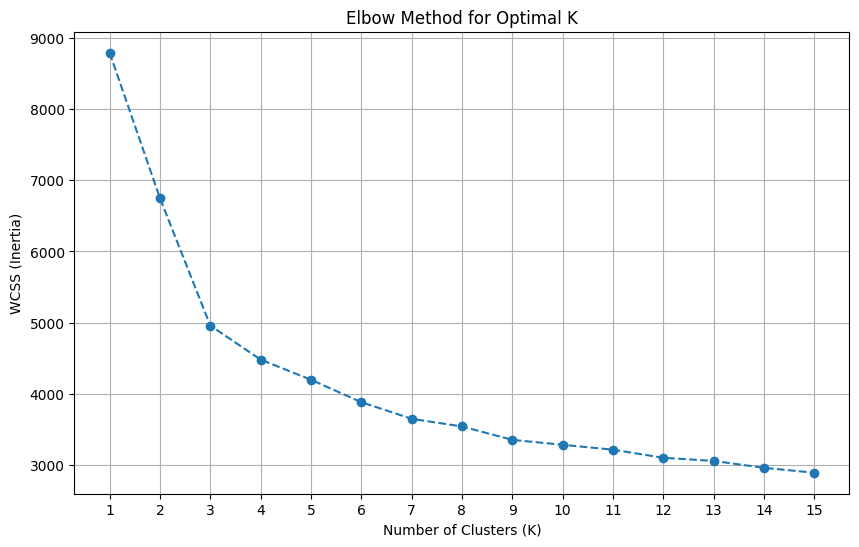

Interpret the graph: Look for the 'bend' or 'elbow' point where the rate of decrease in WCSS significantly slows down.


In [19]:
#Elbow Method

wcss = []
# Test a range of K values, e.g., from 1 to 15 or 20
# Start from 1, but for Silhouette, you'll need K >= 2
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # n_init='auto' is recommended
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Interpret the graph: Look for the 'bend' or 'elbow' point where the rate of decrease in WCSS significantly slows down.")

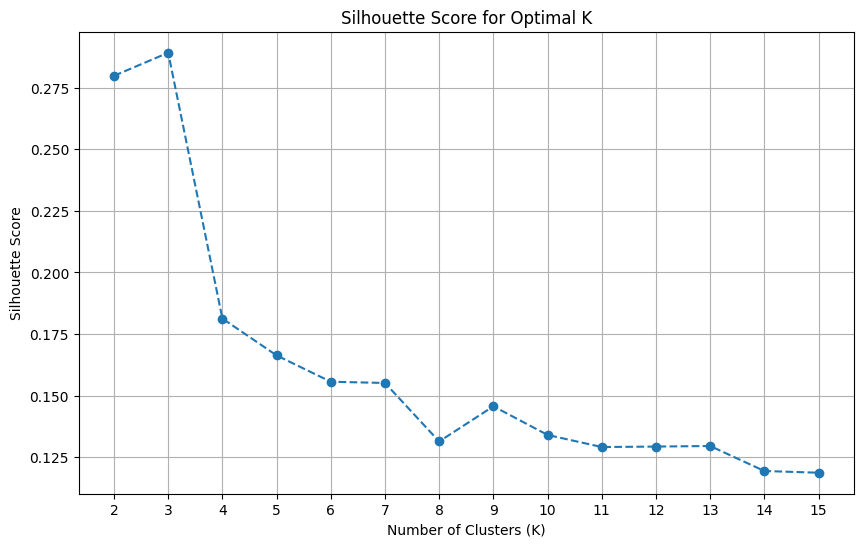

Interpret the graph: Look for the K value that has the highest Silhouette Score.


In [20]:
# Silhouette Score

from sklearn.metrics import silhouette_score

silhouette_scores = []
# Silhouette score requires at least 2 clusters
k_range_silhouette = range(2, 16) # Start from K=2

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

print("Interpret the graph: Look for the K value that has the highest Silhouette Score.")

In [21]:
print("\n--- Interpreting Archetypes for Different K Values ---")

# Customize this list with the specific K values you want to analyze.
selected_k_values_for_analysis = [13] # <<<=== CUSTOMIZE THIS LIST BASED ON YOUR ANALYSIS

# Dictionary to store fitted KMeans models if you haven't stored them from the K-selection phase
kmeans_models = {}


for k in selected_k_values_for_analysis:
    print(f"\n--- Analyzing K={k} Clusters ---")

    # Fit KMeans model for the current K if not already stored
    if k not in kmeans_models:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X_scaled_df) # Use X_scaled_df for fitting
        kmeans_models[k] = kmeans
    else:
        kmeans = kmeans_models[k] # Use the already fitted model

    cluster_labels = kmeans.labels_

    # Add cluster labels to a temporary copy of the original DataFrame for analysis
    df_analysis = df.copy() # df should have all engineered features
    df_analysis[f'Cluster_K{k}'] = cluster_labels

    # Calculate mean for each feature per cluster (using unscaled data for interpretability)
    # X.columns represents the unscaled feature names used in X_scaled_df
    cluster_means = df_analysis.groupby(f'Cluster_K{k}')[X.columns].mean()
    print("Cluster Means (Average Feature Values for each Archetype - Unscaled):")
    print(cluster_means)
    # --- SAVE TO CSV: Cluster Means ---
    cluster_means.to_csv(f'cluster_means_K{k}.csv')
    print(f"Cluster means for K={k} saved to cluster_means_K{k}.csv")


    # Analyze Positional Distribution within each cluster
    print("\nPositional Distribution within each Cluster:")
    position_distribution = df_analysis.groupby(f'Cluster_K{k}')['Pos'].value_counts(normalize=True).unstack(fill_value=0)
    print(position_distribution)
    # --- SAVE TO CSV: Positional Distribution ---
    position_distribution.to_csv(f'position_distribution_K{k}.csv')
    print(f"Positional distribution for K={k} saved to position_distribution_K{k}.csv")


    # Display top players for each cluster (example)
    print("\nTop Players by Minutes Played in each Cluster (Example):")
    # Prepare a list to store data for all players in current K, to save to one CSV
    all_cluster_players_data = []

    for cluster_id in range(k):
        # Get players in this cluster, sorted by minutes played (MP)
        cluster_players = df_analysis[df_analysis[f'Cluster_K{k}'] == cluster_id].sort_values(by='MP', ascending=False)
        print(f"  Cluster {cluster_id} (Top 5 players by MP):")
        # Adjust displayed columns as desired for interpretation
        display_cols = ['Player', 'Pos', 'MP', 'PTS_per36', 'AST_per36', 'TRB_per36', 'eFG%']
        print(cluster_players[display_cols].head())

        # Add all players from this cluster to the list for full CSV export
        # Also add the cluster ID to each player's data
        cluster_players_with_id = cluster_players[display_cols + [f'Cluster_K{k}']].copy()
        all_cluster_players_data.append(cluster_players_with_id)

    # --- SAVE TO CSV: All Players with Cluster Assignments ---
    if all_cluster_players_data:
        full_players_df = pd.concat(all_cluster_players_data)
        full_players_df.to_csv(f'all_players_with_clusters_K{k}.csv', index=False)
        print(f"All players with their K={k} cluster assignments saved to all_players_with_clusters_K{k}.csv")
    else:
        print(f"No players found for K={k} to save to CSV.")


--- Interpreting Archetypes for Different K Values ---

--- Analyzing K=13 Clusters ---
Cluster Means (Average Feature Values for each Archetype - Unscaled):
              FG_per36  FGA_per36  3P_per36  3PA_per36  2P_per36  2PA_per36  \
Cluster_K13                                                                   
0             6.128993  14.069914  3.049212   8.025133  3.091001   6.037771   
1             7.237617  12.813114  0.649468   1.983292  6.603463  10.830128   
2             7.911267  17.012428  2.159417   5.868380  5.761395  11.148739   
3             4.727507  11.150927  2.064769   5.818890  2.670091   5.331314   
4             5.414236  11.572437  1.460794   4.431707  3.954448   7.125860   
5             7.353887  16.884112  2.822695   7.608087  4.531429   9.267074   
6             3.948482   9.378572  2.192789   6.065067  1.757253   3.320138   
7             3.893201   8.105131  0.909574   2.617642  2.989236   5.502623   
8             5.151669   8.299131  0.087869   0.388

In [22]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG%', '3P%', '2P%',
       'eFG%', 'FT%', 'FG_per36', 'FGA_per36', '3P_per36', '3PA_per36',
       '2P_per36', '2PA_per36', 'FT_per36', 'FTA_per36', 'ORB_per36',
       'DRB_per36', 'TRB_per36', 'AST_per36', 'STL_per36', 'BLK_per36',
       'TOV_per36', 'PF_per36', 'PTS_per36'],
      dtype='object')

In [24]:
K = 13  # Number of clusters
cluster_col = f'Cluster_K{K}'

top_players_list = []
for cluster_id in range(K):
    top_players = (
        df_analysis[df_analysis[cluster_col] == cluster_id]
        .sort_values(by='MP', ascending=False)
        .head(5)
        .copy()
    )
    top_players['Cluster'] = cluster_id
    top_players_list.append(top_players)

all_top_players = pd.concat(top_players_list, ignore_index=True)
all_top_players.to_csv(f'top_5_players_per_cluster_K{K}_all_stats.csv', index=False)
print(f"Saved: top_5_players_per_cluster_K{K}_all_stats.csv")

Saved: top_5_players_per_cluster_K13_all_stats.csv


In [25]:
import pandas as pd
from sklearn.cluster import KMeans # Make sure this import is at the top of your script

# Assuming X_scaled_df, df, and features_for_clustering are already defined and prepared.
# 'df' should be the DataFrame that already contains all the engineered features
# (e.g., 'PTS_per36', 'eFG%', 'MP', etc.).

# Define your chosen K value
final_k_value = 13 # This is the K you decided on

# Fit KMeans model for the final K (or retrieve if already fitted and stored in kmeans_models)
# If you ran the loop and stored models, you can use: kmeans = kmeans_models[final_k_value]
# Otherwise, fit it now:
kmeans_final = KMeans(n_clusters=final_k_value, random_state=42, n_init='auto')
kmeans_final.fit(X_scaled_df) # Fit to your scaled data

# Get the cluster labels
cluster_labels_final = kmeans_final.labels_

# Add cluster labels to your main DataFrame
# Using df directly if it contains all engineered features and is your main working DataFrame
df[f'Cluster_K{final_k_value}'] = cluster_labels_final

# --- Define your master archetype mapping ---
# IMPORTANT: Replace these with YOUR FINALIZED NAMES and ensure the cluster IDs match
archetype_mapping = {
    0: "Off-ball 3&D three-point shooters",
    1: "Scoring mobile centers",
    2: "Efficient mid-size scorers",
    3: "Veteran pure guards",
    4: "Mid-size defensive forwards",
    5: "High-volume perimeter playmakers",
    6: "Midcourt 3&D reserves",
    7: "Low-scoring, playmaking defensive wings",
    8: "Efficient rebounding paint protectors",
    9: "All-around high-usage bigs",
    10: "High-volume, versatile scorers", # <--- Re-evaluate this one
    11: "Low-volume defensive playmakers",
    12: "High-impact playmaking scorers"
}

# Create the new 'Archetype_Name' column by mapping the cluster IDs
df['Archetype_Name'] = df[f'Cluster_K{final_k_value}'].map(archetype_mapping)

# Display a sample to confirm the new column
print("\nDataFrame with Archetype Names:")
print(df[['Player', 'Pos', 'MP', f'Cluster_K{final_k_value}', 'Archetype_Name', 'PTS_per36', 'AST_per36', 'TRB_per36', 'eFG%']].head())

# Save your final DataFrame with Archetype Names to CSV
output_filename = f'nba_players_with_archetypes_K{final_k_value}_final.csv'
df.to_csv(output_filename, index=False)
print(f"\nFinal player data with archetypes saved to {output_filename}")


DataFrame with Archetype Names:
             Player Pos    MP  Cluster_K13  \
0  Precious Achiuwa   C  20.7            1   
1      Steven Adams   C  27.0            8   
2       Bam Adebayo   C  34.6            1   
3      Ochai Agbaji  SG  20.5            6   
4      Santi Aldama  PF  21.8            4   

                          Archetype_Name  PTS_per36  AST_per36  TRB_per36  \
0                 Scoring mobile centers  16.000000   1.565217  10.434783   
1  Efficient rebounding paint protectors  11.466667   3.066667  15.333333   
2                 Scoring mobile centers  21.225434   3.329480   9.572254   
3                  Midcourt 3&D reserves  13.873171   1.931707   3.687805   
4            Mid-size defensive forwards  14.862385   2.146789   7.926606   

    eFG%  
0  0.521  
1  0.597  
2  0.541  
3  0.532  
4  0.560  

Final player data with archetypes saved to nba_players_with_archetypes_K13_final.csv


In [26]:


# Group by Archetype Name and calculate descriptive statistics for key metrics
archetype_summary = df.groupby('Archetype_Name').agg(
    # Demographic insights
    Player_Count=('Player', 'count'),
    Avg_Age=('Age', 'mean'),
    Avg_Games_Played=('G', 'mean'),
    Avg_Minutes_Played=('MP', 'mean'),

    # General performance (using some per_36 for consistency, but also raw for context)
    Avg_PTS_per36=('PTS_per36', 'mean'),
    Avg_AST_per36=('AST_per36', 'mean'),
    Avg_TRB_per36=('TRB_per36', 'mean'),
    Avg_STL_per36=('STL_per36', 'mean'),
    Avg_BLK_per36=('BLK_per36', 'mean'),
    Avg_eFG_pct=('eFG%', 'mean'),
    Avg_3P_pct=('3P%', 'mean'),
    Avg_TOV_per36=('TOV_per36', 'mean'),
    Avg_PF_per36=('PF_per36', 'mean'),

    # You can add other relevant stats that were NOT in your clustering features
    # For example, if you had Team +/- when player is on court, or Win Shares per 48 min
    # Avg_Net_Rating=('Net_Rating', 'mean'),
    # Avg_Win_Shares_per48=('WS_per_48', 'mean'),
).sort_values(by='Player_Count', ascending=False) # Sort by size for easy viewing

print("\n--- Archetype Summary Statistics ---")
print(archetype_summary)

# Save this summary for your records
archetype_summary.to_csv('archetype_summary_statistics.csv')
print("\nArchetype summary statistics saved to 'archetype_summary_statistics.csv'")

# Positional distribution (you already have this, but good to revisit)
print("\n--- Positional Distribution within Archetypes ---")
position_distribution = df.groupby('Archetype_Name')['Pos'].value_counts(normalize=True).unstack(fill_value=0)
print(position_distribution)
position_distribution.to_csv('archetype_position_distribution.csv')
print("\nArchetype positional distribution saved to 'archetype_position_distribution.csv'")


--- Archetype Summary Statistics ---
                                         Player_Count    Avg_Age  \
Archetype_Name                                                     
Mid-size defensive forwards                        72  25.416667   
Midcourt 3&D reserves                              72  26.972222   
Veteran pure guards                                69  27.724638   
Off-ball 3&D three-point shooters                  62  25.919355   
Scoring mobile centers                             45  25.955556   
High-volume perimeter playmakers                   38  25.789474   
Efficient rebounding paint protectors              35  24.514286   
Low-scoring, playmaking defensive wings            34  26.764706   
Low-volume defensive playmakers                    29  25.034483   
High-volume, versatile scorers                     25  27.800000   
Efficient mid-size scorers                         22  25.318182   
All-around high-usage bigs                          9  27.555556   
High-impac

In [34]:
# --- Ensure these variables are defined ---

# Assuming 'df' is your DataFrame after filtering and feature engineering
# (i.e., it already contains 'PTS_per36', 'eFG%', etc., and 'MP')

# Define the list of features you used for clustering
# THIS IS THE MISSING DEFINITION FOR 'features_for_clustering'
features_for_clustering = [
    'PTS_per36', 'AST_per36', 'TRB_per36', '3P_per36', 'BLK_per36',
    'STL_per36', 'TOV_per36', 'eFG%'
    # Make sure this list exactly matches the names of the columns
    # that exist in your 'df' DataFrame and were used for X_scaled_df
]

# Ensure 'final_k_value' and 'archetype_mapping' are also defined
# (from the previous step where you finalized and named your clusters)
final_k_value = 13 # Your chosen K value
archetype_mapping = {
    0: "Off-ball 3&D three-point shooters",
    1: "Scoring mobile centers",
    2: "Efficient mid-size scorers",
    3: "Veteran pure guards",
    4: "Mid-size defensive forwards",
    5: "High-volume perimeter playmakers",
    6: "Midcourt 3&D reserves",
    7: "Low-scoring, playmaking defensive wings",
    8: "Efficient rebounding paint protectors",
    9: "All-around high-usage bigs",
    10: "All-around offensive shooters", # Remember to confirm this name
    11: "Low-volume defensive playmakers",
    12: "High-impact playmaking scorers"
}

# --- END of essential variable definitions ---

# Your Plotly Express code for radar charts follows here...
# (The code you provided in your last prompt)

In [38]:
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Ensure these variables are defined ---
# (As provided in the previous prompt, assuming they are correctly set up earlier)
# df, final_k_value, archetype_mapping, features_for_clustering

# --- Re-prepare the scaled cluster means DataFrame for plotting ---
cluster_means_for_plotting = df.groupby('Archetype_Name')[features_for_clustering].mean()

radar_features = [
    'PTS_per36', 'AST_per36', 'TRB_per36', '3P_per36', 'BLK_per36',
    'STL_per36', 'TOV_per36', 'eFG%'
]

scaler_radar = MinMaxScaler()
scaled_radar_data = scaler_radar.fit_transform(cluster_means_for_plotting[radar_features])
scaled_radar_df = pd.DataFrame(scaled_radar_data, columns=radar_features, index=cluster_means_for_plotting.index)

print("\nScaled data for radar charts (first 5 archetypes):")
print(scaled_radar_df.head())

# --- CRUCIAL FIX: Melt the DataFrame for Plotly Express ---
# This transforms the 'wide' scaled_radar_df into a 'long' format
# where features become rows, and their values are in a single 'value' column.
# This is required when 'r' and 'theta' are single column names.

# Reset index to make Archetype_Name a regular column before melting
df_long_format = scaled_radar_df.reset_index().melt(
    id_vars=['Archetype_Name'], # Keep Archetype_Name as identifier
    value_vars=radar_features,  # Columns to "unpivot"
    var_name='Statistic',       # New column name for feature names (theta)
    value_name='Scaled_Value'   # New column name for scaled values (r)
)

print("\nMelted data for radar charts (first 5 rows):")
print(df_long_format.head())


# --- Plotting Options with Plotly Express (Updated) ---

# Option 1: Plot all archetypes on one interactive radar chart
fig_all = px.line_polar(
    df_long_format,            # Use the long-format DataFrame
    r='Scaled_Value',          # Single column for values (radius)
    theta='Statistic',         # Single column for categories (angle)
    line_close=True,
    color='Archetype_Name',
    title='All Player Archetypes Comparison (Scaled Features)',
    labels={'Scaled_Value': 'Scaled Value (0-1)', 'Statistic': 'Statistic'},
    height=600,
    width=800
)
fig_all.update_traces(fill='toself')
fig_all.show()


# # Option 2: Plot specific archetypes for focused comparisons (Updated)
# archetype_groups_to_compare = {
#     "Top Offensive Engines": [
#         "All-around high-usage bigs",
#         "High-impact playmaking scorers",
#         "High-volume perimeter playmakers",
#         "Ultra-High Usage Lead Guards / Offensive Maestros"
#     ],
#     "Defensive Specialists": [
#         "Mid-size defensive forwards",
#         "Low-scoring, playmaking defensive wings",
#         "Efficient rebounding paint protectors",
#         "Low-volume defensive playmakers"
#     ],
#     "Shooters & Reserves": [
#         "Off-ball 3&D three-point shooters",
#         "Midcourt 3&D reserves",
#         "All-around offensive shooters"
#     ],
# }

# for group_name, archetypes_in_group in archetype_groups_to_compare.items():
#     # Filter the long-format DataFrame for the current group
#     df_group_plot_long = df_long_format[df_long_format['Archetype_Name'].isin(archetypes_in_group)]

#     if not df_group_plot_long.empty:
#         fig_group = px.line_polar(
#             df_group_plot_long, # Use the filtered long-format DataFrame
#             r='Scaled_Value',
#             theta='Statistic',
#             line_close=True,
#             color='Archetype_Name',
#             title=f'Comparison: {group_name} Archetypes (Scaled Features)',
#             labels={'Scaled_Value': 'Scaled Value (0-1)', 'Statistic': 'Statistic'},
#             height=600,
#             width=800
#         )
#         fig_group.update_traces(fill='toself')
#         fig_group.show()
#     else:
#         print(f"Skipping group '{group_name}' as some archetypes were not found in the data.")


Scaled data for radar charts (first 5 archetypes):
                                       PTS_per36  AST_per36  TRB_per36  \
Archetype_Name                                                           
All-around high-usage bigs              0.972862   0.761116   0.704015   
Efficient mid-size scorers              0.620121   0.263607   0.097941   
Efficient rebounding paint protectors   0.121205   0.000000   1.000000   
High-impact playmaking scorers          1.000000   1.000000   0.325170   
High-volume perimeter playmakers        0.521669   0.807875   0.084535   

                                       3P_per36  BLK_per36  STL_per36  \
Archetype_Name                                                          
All-around high-usage bigs             0.245970   0.427469   0.384828   
Efficient mid-size scorers             0.613304   0.000000   0.090506   
Efficient rebounding paint protectors  0.000000   1.000000   0.095234   
High-impact playmaking scorers         1.000000   0.041108   0.2

In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Ensure these variables are defined ---
# Assuming df, final_k_value, archetype_mapping, features_for_clustering are available.

# --- Prepare the scaled cluster means DataFrame for plotting ---
cluster_means_for_plotting = df.groupby('Archetype_Name')[features_for_clustering].mean()

radar_features = [
    'PTS_per36', 'AST_per36', 'TRB_per36', '3P_per36', 'BLK_per36',
    'STL_per36', 'TOV_per36', 'eFG%'
]
# Ensure radar_features exist in cluster_means_for_plotting.columns.
# If not, you'll get a KeyError.

scaler_radar = MinMaxScaler()
scaled_radar_data = scaler_radar.fit_transform(cluster_means_for_plotting[radar_features])
scaled_radar_df = pd.DataFrame(scaled_radar_data, columns=radar_features, index=cluster_means_for_plotting.index)

print("\nScaled data for radar charts (first 5 archetypes):")
print(scaled_radar_df.head())


# --- Create Subplots for All 13 Archetypes ---

num_archetypes = len(scaled_radar_df)
# Determine grid size (e.g., 4 rows, 4 columns for 13 plots, leaves 3 empty)
n_cols = 4
n_rows = (num_archetypes + n_cols - 1) // n_cols # Calculate rows needed

# Prepare subplot titles
subplot_titles = [name for name in scaled_radar_df.index]
# Pad subplot_titles with empty strings if num_archetypes is not a perfect multiple of n_cols
# to fill the grid for make_subplots
subplot_titles.extend([''] * (n_rows * n_cols - num_archetypes))


fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    specs=[[{'type': 'polar'}] * n_cols] * n_rows, # Define all subplots as polar type
    subplot_titles=subplot_titles, # Add titles below each subplot
    vertical_spacing=0.08, # Adjust vertical spacing between subplots
    horizontal_spacing=0.05 # Adjust horizontal spacing between subplots
)

# Loop through each archetype and add a radar trace to its respective subplot
for i, archetype_name in enumerate(scaled_radar_df.index):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1

    # Extract data for the current archetype
    archetype_data = scaled_radar_df.loc[archetype_name]
    
    # Create a Scatterpolar trace
    trace = go.Scatterpolar(
        r=archetype_data[radar_features].tolist() + [archetype_data[radar_features].tolist()[0]], # Close the polygon
        theta=radar_features + [radar_features[0]], # Close the polygon
        fill='toself',
        name=archetype_name,
        mode='lines',
        line_color='blue' # You can customize color here or use a color map
    )

    # Add trace to the subplot
    fig.add_trace(trace, row=row, col=col)

    # Update radial axis range for consistency across all plots
    # Ensures all plots have the same 0-1 scale for easy comparison
    fig.update_layout(
        polar={
            'radialaxis': {'range': [0, 1], 'showticklabels': True, 'ticks': 'outside'}
        },
        height=n_rows * 300,  # Adjust figure height based on number of rows
        width=n_cols * 300,   # Adjust figure width based on number of columns
        title_text="NBA Player Archetype Profiles",
        showlegend=False # Hide individual trace legends as names are in subplot titles
    )

    # Update subplot specific layouts
    # This loop updates each polar subplot layout individually
    # The 'f"polar{i+1}"' is how Plotly names the polar subplots in `make_subplots`
    fig.update_layout({
        f"polar{i+1}": {
            'radialaxis': {
                'visible': True,
                'range': [0, 1], # Ensure consistent scale
                'tickvals': [0, 0.25, 0.5, 0.75, 1], # Custom tick values
                'ticktext': ['0', '0.25', '0.5', '0.75', '1'], # Custom tick labels
            },
            'angularaxis': {
                'rotation': 90, # Start angle at the top
                'direction': "clockwise", # Go clockwise
                'tickvals': [i * (360 / len(radar_features)) for i in range(len(radar_features))],
                'ticktext': radar_features # Use feature names as axis labels
            }
        }
    })

# Adjust general layout for all subplots
fig.update_layout(
    title_x=0.5, # Center the main title
    margin=dict(t=50, b=50, l=50, r=50), # Adjust margins
)


fig.show()


Scaled data for radar charts (first 5 archetypes):
                                       PTS_per36  AST_per36  TRB_per36  \
Archetype_Name                                                           
All-around high-usage bigs              0.972862   0.761116   0.704015   
Efficient mid-size scorers              0.620121   0.263607   0.097941   
Efficient rebounding paint protectors   0.121205   0.000000   1.000000   
High-impact playmaking scorers          1.000000   1.000000   0.325170   
High-volume perimeter playmakers        0.521669   0.807875   0.084535   

                                       3P_per36  BLK_per36  STL_per36  \
Archetype_Name                                                          
All-around high-usage bigs             0.245970   0.427469   0.384828   
Efficient mid-size scorers             0.613304   0.000000   0.090506   
Efficient rebounding paint protectors  0.000000   1.000000   0.095234   
High-impact playmaking scorers         1.000000   0.041108   0.2